In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
df = pd.read_csv("fake-news/train.csv")                    #Importing file


In [3]:
df.head()                                                # Give us the top 5 data lines of the data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
X = df.drop(["label"],axis=1)                     # Dividing the data into two parts , "X" contains features except "label"

In [5]:
y = df["label"]                                   # y contains "label" feature

In [6]:
y.head()                                          # top 5 data lines in y variable("label")

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [7]:
df.shape                                         # The shape of the file imported

(20800, 5)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer     # importing bag of words, TF-IDF and hasvector
df=df.dropna()                                                                                   # droping all the NA values
df.head(10)                                                                                     # getiing the the top 10 values of input data


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [9]:
df.shape                                                     # Shape of the input data after dropping NA values

(18285, 5)

In [10]:
messages=df.copy()                                           # copying imported data into a variable "messages"
messages.reset_index(inplace=True)                           # Reseting the a column "Index"
messages.head(101)                                           # getting the first 101 data lines of messages


,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
96,109,109,"Massive ESPN Financial, Subscriber Losses Drag...",Dylan Gwinn,A year that saw arguably the five greatest cha...,0
97,110,110,"Megyn Kelly, Contract Set to Expire Next Year,...",John Koblin,"Barbara Walters is retired, Oprah Winfrey is r...",0
98,111,111,Teacher Suspended for Allowing Students to Hit...,Katherine Rodriguez,A high school Spanish teacher from Colorado ha...,0
99,112,112,BREAKING : Trump Expressed Concern Over Anthon...,Amy Moreno,BREAKING : Trump Expressed Concern Over Anthon...,1


In [11]:
messages['title'][100]                                          # 101th element of the data file


'Snap Shares Leap 44% in Debut as Investors Doubt Value Will Vanish - The New York Times'

In [12]:
import nltk                                                    
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []                                            
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])                      # removing punctuations form the data
    review = review.lower()                                                      # making all the words into lower
    review = review.split()                                                      # splitting the sentences into words
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] # applying the stemming
    review = ' '.join(review)         
    corpus.append(review)                                                        # appending the the cleaned data in corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
corpus[69]                                                                       # 68th element in the corpus

'louisiana simon bile u presidenti race tuesday even brief new york time'

# COUNTVECTORIZER or BAG OF WORDS

In [14]:
from sklearn.feature_extraction.text import CountVectorizer                     # Bag of words
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))                       # max_features = maximum number of feature , ngram_range = combination 1 to 3 ngrams
X = cv.fit_transform(corpus).toarray()                                          # applying bag of words and converting dat ainto array
y=messages['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)  # splitting the data into 67 -33
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())        # converting a data frame
count_df.head()                                                         # top 5 lines of the data



,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def plot_confusion_matrix(cm, classes,                                     # function to get the confusion matrix
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """ 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)                                   # Plotting the data using matplotlib
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)               
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")                      # colour ranges from white to black.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultiNomial NB

The accuracy of multinomial Naive bayes:   0.9011
Confusion matrix, without normalization


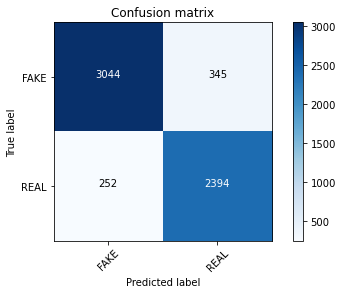

In [16]:
from sklearn.naive_bayes import MultinomialNB                                      # import Multinomial Naive bayes
classifier=MultinomialNB()
from sklearn import metrics
import itertools
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("The accuracy of multinomial Naive bayes:   %0.4f" % score)                                                # printing the accuracy of the Multinomial Naive Bayes
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])                               # plotting confusion Matrix for multinomil NB with bag of words.



In [17]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("The accuraccy for MUltinomial NB is : %.5f " % score)

The accuraccy for MUltinomial NB is : 0.90108 


# Passive Aggressive Classifier Algorithm

In [18]:
from sklearn.linear_model import PassiveAggressiveClassifier                            # importing Passive Aggrevise Classifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)                                   # setting the epochs as 50 , we can increase or decrese.

Confusion matrix, without normalization


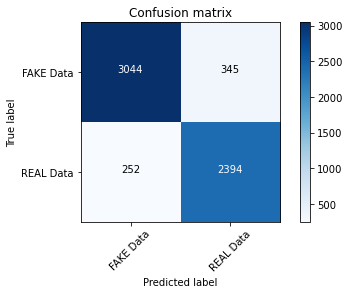

In [19]:
linear_clf.fit(X_train, y_train)                                                       # applying the model
pred2 = linear_clf.predict(X_test)
score2 = metrics.accuracy_score(y_test, pred)
cm2 = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])                         # plotting confusion matrix for PACA with bag of words.

In [20]:
print("The accuracy for PACA is :   %.4f" % score2)

The accuracy for PACA is :   0.9011


# Multinomial Classifier with Hyperparameter


In [21]:
classifier=MultinomialNB(alpha=0.2)                                       # importing multinomial classifier with hyper parameter
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Rohan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8906379453189727
Alpha: 0.1, Score : 0.9012427506213753
Alpha: 0.2, Score : 0.9015741507870754
Alpha: 0.30000000000000004, Score : 0.9015741507870754
Alpha: 0.4, Score : 0.9007456503728252
Alpha: 0.5, Score : 0.9005799502899752
Alpha: 0.6000000000000001, Score : 0.9015741507870754
Alpha: 0.7000000000000001, Score : 0.9019055509527755
Alpha: 0.8, Score : 0.9007456503728252
Alpha: 0.9, Score : 0.9009113504556753


In [22]:
feature_names = cv.get_feature_names()
classifier.coef_[0]
print(sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20], "\n")                 # gives the top 20 best words
print(sorted(zip(classifier.coef_[0], feature_names))[:100])                                    # gives top 100 worst words


[(-4.000126376264419, 'trump'), (-4.287849914102974, 'hillari'), (-4.396366840720952, 'clinton'), (-4.899946945868169, 'elect'), (-5.176575820557189, 'new'), (-5.2347075860082, 'comment'), (-5.273945400633064, 'video'), (-5.386793987777445, 'war'), (-5.396799073738407, 'us'), (-5.4119969346478385, 'hillari clinton'), (-5.417114653084819, 'fbi'), (-5.4806617042015136, 'vote'), (-5.566232695514838, 'email'), (-5.578216062401935, 'world'), (-5.633992599859346, 'obama'), (-5.734478675432337, 'donald'), (-5.763072474799078, 'donald trump'), (-5.785067496384624, 'russia'), (-5.846201884877992, 'day'), (-5.862087842466802, 'america')] 

[(-10.79496177525616, 'abe'), (-10.79496177525616, 'abroad'), (-10.79496177525616, 'abus new'), (-10.79496177525616, 'abus new york'), (-10.79496177525616, 'act new'), (-10.79496177525616, 'act new york'), (-10.79496177525616, 'advic'), (-10.79496177525616, 'advis new'), (-10.79496177525616, 'advis new york'), (-10.79496177525616, 'afford care'), (-10.79496177








# Applying everything using TF-IDF





In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer       # importing the TF-IDF
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(3,3))      # same parameters compared to bag of words with different n_gram (can be altered)
XX=tfidf_v.fit_transform(corpus).toarray()


In [24]:
from sklearn.model_selection import train_test_split              # splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.33, random_state=0)

In [25]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head()


,abandon new york,abbi martin expos,abc new york,abc news coconut,abduct ring expos,abedin swore oath,abedin weiner testifi,abort law new,abort new york,abort provid share,...,zelda breath wild,zika new york,zika scaremong washington,zika tuesday even,zika viru caus,zika viru new,zone declar militar,zone help peopl,zone new york,zone two place
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MULTINOMIAL NB TF-IDF

Confusion matrix, without normalization


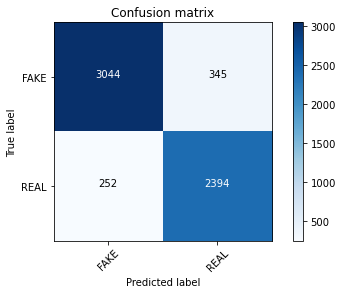

In [26]:
classifier.fit(X_train, y_train)                                            # importing multinomial Naive bayes after TF-IDF
pred3 = classifier.predict(X_test)
score3 = metrics.accuracy_score(y_test, pred)
cm3 = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm3, classes=['FAKE', 'REAL'])                       # plotting confusion matrix with Fake and Real as classes

In [27]:
print("The accuracy of multinomial NB TF-idf :   %0.4f" % score3)


The accuracy of multinomial NB TF-idf :   0.9011


 # Passive Aggressive Classifier Algorithm Tf-IDF


Confusion matrix, without normalization


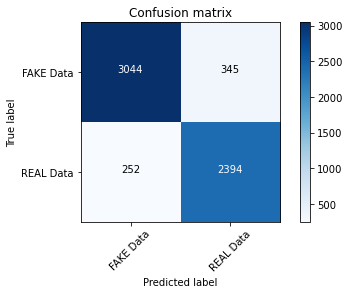

In [28]:
linear_clf.fit(X_train, y_train)                           # importing PACA and fitting the model
pred4 = linear_clf.predict(X_test)
score4 = metrics.accuracy_score(y_test, pred)
cm4 = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm4, classes=['FAKE Data', 'REAL Data'])    # plotting the confusion matrix

In [29]:
print("The accuracy of PACA tf-idf is :   %0.4f" % score4)


The accuracy of PACA tf-idf is :   0.9011


# Multinomial Classifier with Hyperparameter TF-idf


In [30]:
classifier=MultinomialNB(alpha=0.1)    # fitting the multinomial classifier model with hyperparameters

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Rohan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.6676056338028169
Alpha: 0.1, Score : 0.671913835956918
Alpha: 0.2, Score : 0.6717481358740679
Alpha: 0.30000000000000004, Score : 0.6715824357912179
Alpha: 0.4, Score : 0.671913835956918
Alpha: 0.5, Score : 0.671913835956918
Alpha: 0.6000000000000001, Score : 0.6722452361226181
Alpha: 0.7000000000000001, Score : 0.6725766362883181
Alpha: 0.8, Score : 0.6725766362883181
Alpha: 0.9, Score : 0.6729080364540182
